Data preprocessing and engineering techniques generally refer to the addition, deletion, or transformation of data.  The time spent on identifying data engineering needs can be significant and requires you to spend substantial time understanding your data...or as Leo Breiman said "live with your data before you plunge into modeling" [@breiman2001statistical p. 201]. Although this course primarily focuses on applying machine learning algorithms, feature engineering can make or break an algorithm’s predictive ability and deserves your continued focus and education.

We will not cover all the potential ways of implementing feature engineering; however, we'll cover several fundamental preprocessing tasks that has the potential to significantly improve modeling performance. Moreover, different models have different sensitivities to the type of target and feature values in the model and we will try to highlight some of these concerns. For more in depth coverage of feature engineering, please refer to @kuhn2019feature and @zheng2018feature.

By the end of this module you will know:

- When and how to transform the response variable ("target engineering")
- How to deal with missing values
- When to filter unnecessary features
- Common ways to transform numeric features
- Common ways to transform categorical features
- How to apply dimension reduction
- How to properly combine multiple preprocessing steps into the modeling process

## Prerequisites

In [2]:
# Helper packages
import missingno as msno
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle, themes
themes.theme_set(new=themes.theme_light())

# Modeling pre-processing with scikit-learn functionality
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# Modeling pre-processing with non-scikit-learn packages
#from category_encoders.ordinal import OrdinalEncoder
#from feature_engine.categorical_encoders import RareLabelCategoricalEncoder

# Modeling
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [3]:
# Ames housing data
ames = pd.read_csv("../data/ames.csv")

# create train/test split
train, test = train_test_split(ames, train_size=0.7, random_state=123)

# separate features from labels and only use numeric features
X_train = train.drop("Sale_Price", axis=1)
y_train = train[["Sale_Price"]]

## Missing Data

In [5]:
ames_raw = pd.read_csv("../data/ames_raw.csv")

# count missing values
ames_raw.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

<AxesSubplot:>

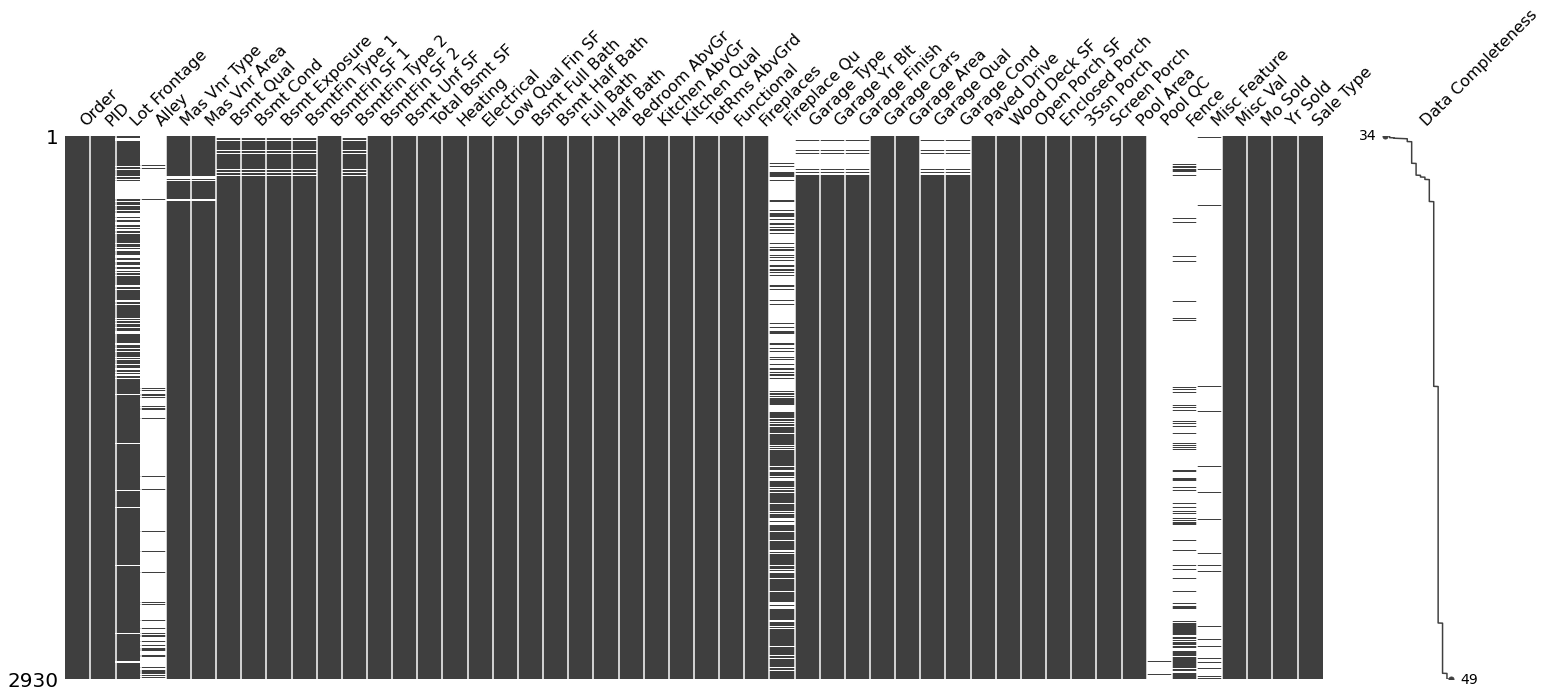

In [6]:
# can you identify patterns of missing data?
# missingness is represented with white
msno.matrix(ames_raw, labels=True, filter="bottom", sort="ascending", n=50)

<AxesSubplot:>

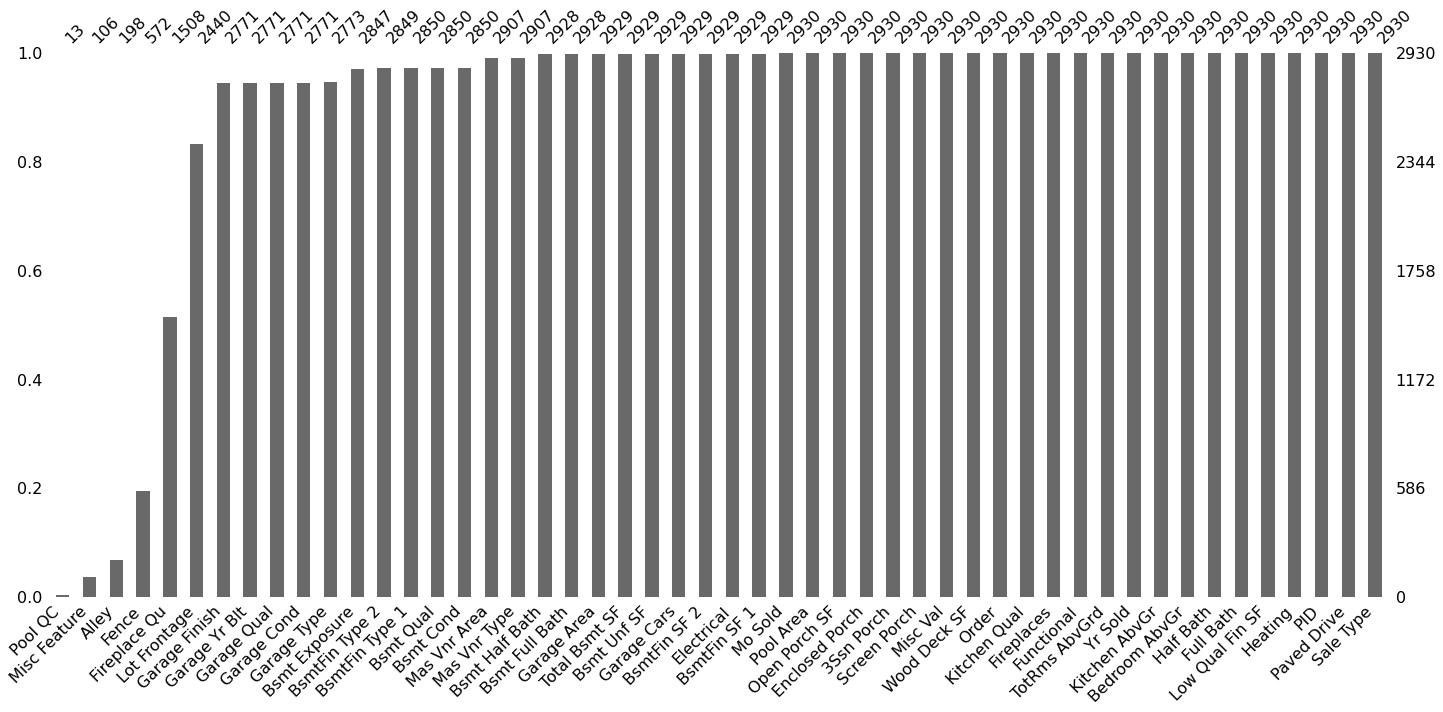

In [7]:
# which features have most missing?
# this chart shows the number of observations so small bars (i.e. Pool QC)
# represent very few observed values (lots of missingness)
msno.bar(ames_raw, labels=True, filter="bottom", sort="ascending", n=50)

# Numeric features

## Scaling

## Standardizing

# Categorical features

## One-hot & Dummy encoding

## Ordinal encoding

## Category reduction

# Dimension reduction

# Data leakage

# Putting the process together